In [2]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

## The .plot() Method

In [3]:
bb=data.DataReader(name="MSFT", data_source="yahoo", start="2007-07-01", end="2008-12-31")
bb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-07-02,29.799999,29.490000,29.670000,29.740000,47316000.0,22.182808
2007-07-03,30.219999,29.780001,29.790001,30.020000,35202600.0,22.391665
2007-07-05,30.219999,29.830000,30.049999,29.990000,47838500.0,22.369280
2007-07-06,30.040001,29.660000,29.910000,29.969999,57541000.0,22.354361
2007-07-09,29.950001,29.809999,29.860001,29.870001,33831400.0,22.279772


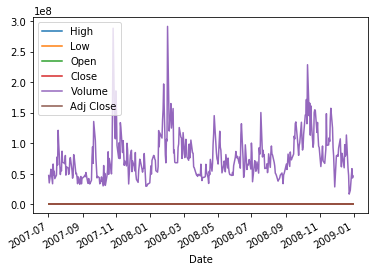

In [18]:
bb.plot()

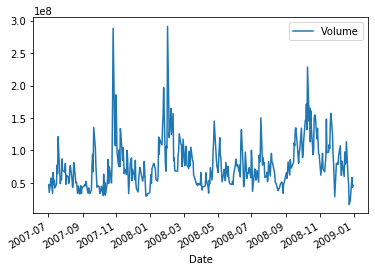

In [19]:
bb.plot(y="Volume")

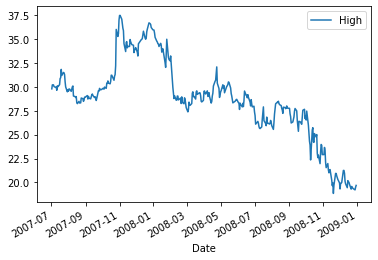

In [20]:
bb.plot(y="High")

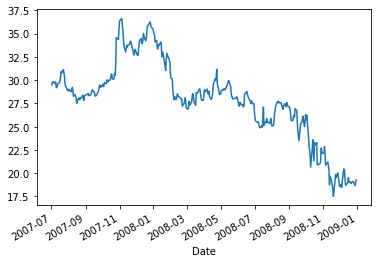

In [21]:
bb["Low"].plot()

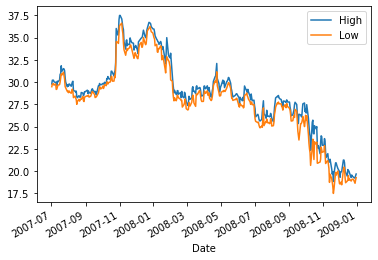

In [35]:
bb[["High", "Low"]].plot()

## Modifying Aesthetics with Templates

In [4]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

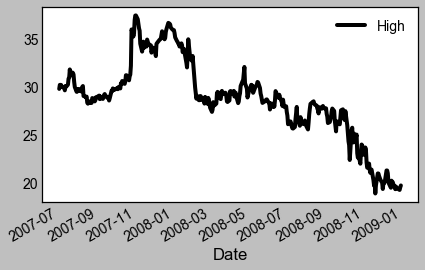

In [13]:
plt.style.use("grayscale")
bb.plot(y="High")

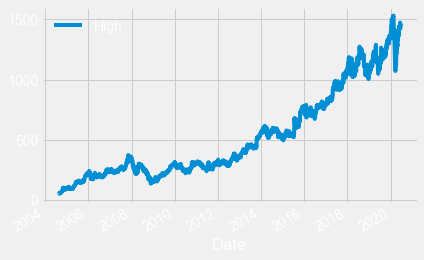

In [26]:
plt.style.use("fivethirtyeight")
bb.plot(y="High")

## Bar Graphs

In [61]:
google=data.DataReader(name="GOOG", data_source="yahoo", start="2004-01-01", end="2020-12-31")
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [17]:
def rank_performence(stock_price):
    if stock_price<=200:
        return "Poor"
    elif stock_price>200 and stock_price<500:
        return "Average"
    else:
        return "Excelent"

In [18]:
google["Close"]

Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-23      54.495735
2004-08-24      52.239193
2004-08-25      52.802086
                 ...     
2020-06-15    1419.849976
2020-06-16    1442.719971
2020-06-17    1451.119995
2020-06-18    1435.959961
2020-06-19    1431.719971
Name: Close, Length: 3987, dtype: float64

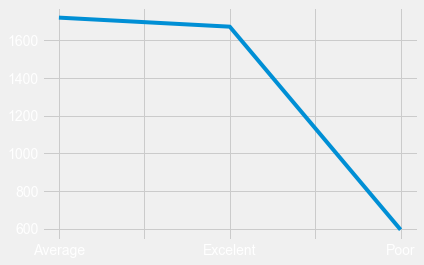

In [29]:
google["Close"].apply(rank_performence).value_counts().plot(kind="line")

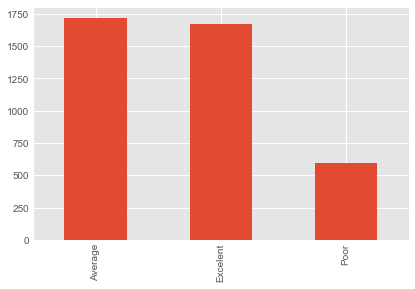

In [31]:
plt.style.use("ggplot")
google["Close"].apply(rank_performence).value_counts().plot(kind="bar")

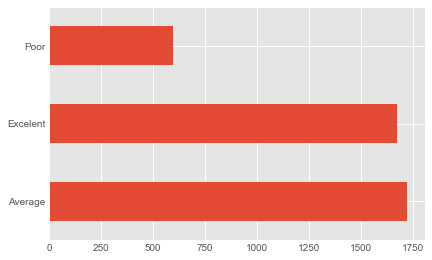

In [33]:
google["Close"].apply(rank_performence).value_counts().plot(kind="barh")

## Pie Charts

In [34]:
apple=data.DataReader(name="AAPL", data_source="yahoo", start="2012-01-01", end="2016-12-31")
apple.head() 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792


In [36]:
apple["Close"].mean()

93.3617192254726

In [37]:
def rank_performence(stock_price):
    if stock_price>=93.3617192254726:
        return "Above Average"
    else:
        return "Bellow Average"

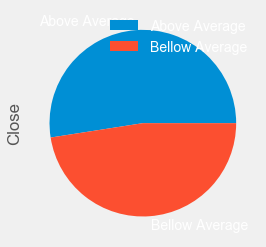

In [46]:
plt.style.use("fivethirtyeight")
apple["Close"].apply(rank_performence).value_counts().plot(kind="pie", legend=True)

##  Histograms

In [60]:
def custom_round(stock_price):
    return int(stock_price/100.0)*100

In [68]:
google["High"].apply(custom_round).value_counts().sort_index()

0        159
100      414
200     1132
300      447
400      157
500      415
600      106
700      276
800       89
900      127
1000     178
1100     231
1200     138
1300      58
1400      50
1500      10
Name: High, dtype: int64

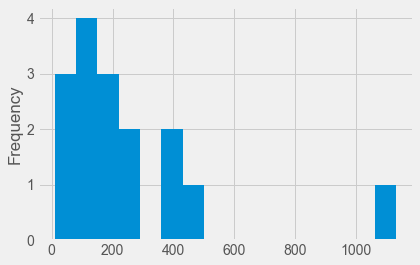

In [69]:
google["High"].apply(custom_round).value_counts().sort_index().plot(kind="hist", bins=16)